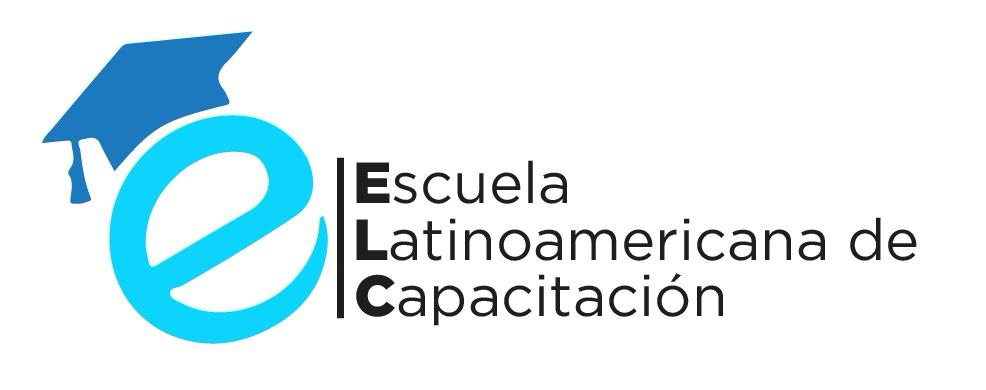

# Curso: "Análisis de Big Data con Inteligencia Artificial"
## 2. Fundamentos de Machine Learning
### Profesor: Diego Miranda Olavarria
#### Data Scientist

In [1]:
import pandas as pd

data = pd.read_excel("banco.xlsx")

data.head()

,ID-Cliente,Renta,Edad,Patrimonio (CLP),Segmento,Sexo,Estado Civil,N° Productos Bancarios,Historial Crediticio,Empleo,Educación
0,1,2619110,68,94817241,2,0,0,3,Malo,2,2
1,2,3168307,43,431220993,2,1,3,3,Regular,0,2
2,3,2629084,44,462836020,2,1,1,3,Malo,1,4
3,4,3911566,59,410375048,2,0,1,2,Bueno,0,2
4,5,2756330,26,327714312,2,1,0,2,Bueno,1,2


In [2]:
data.shape

(1000, 11)

In [3]:
data.describe()

,ID-Cliente,Renta,Edad,Patrimonio (CLP),Segmento,Sexo,Estado Civil,N° Productos Bancarios,Empleo,Educación
count,1000.000000,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,251.811000,2.231333e+06,46.985000,2.490078e+08,1.719000,0.525000,0.704000,2.036000,0.742000,2.703000
std,142.715013,1.036498e+06,13.309918,1.479973e+08,0.449712,0.499624,0.786767,0.803336,0.726611,1.166255
min,1.000000,4.219590e+05,25.000000,5.797968e+06,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,130.750000,1.353277e+06,35.000000,1.120963e+08,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,252.000000,2.319486e+06,47.000000,2.516610e+08,2.000000,1.000000,1.000000,2.000000,1.000000,3.000000
75%,375.000000,3.114227e+06,59.000000,3.834068e+08,2.000000,1.000000,1.000000,3.000000,1.000000,4.000000
max,500.000000,3.988633e+06,69.000000,4.995585e+08,2.000000,1.000000,3.000000,3.000000,2.000000,4.000000


In [4]:
# Para clasificar primero debemos separar en 2 variables independiente y dependiente
# X = variables independientes 
# y = variable dependiente, que es la que quiero predecir o clasificar


# creacion de variables independientes
X = data.drop('Historial Crediticio', axis=1) 
# creacion de la variable dependiente
y = data['Historial Crediticio']


In [5]:
# creacion de la variable dependiente

y = data['Historial Crediticio']

y


0         Malo
1      Regular
2         Malo
3        Bueno
4        Bueno
        ...   
995    Regular
996      Bueno
997    Regular
998       Malo
999      Bueno
Name: Historial Crediticio, Length: 1000, dtype: object

In [6]:
# seperar los datos en conjunto de entrenamiento y prueba 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train) # datos de entrenamiento estandarizados
X_test = sc.transform(X_test) # datos de prueba estandarizados con los parametros de X_train

# KNN
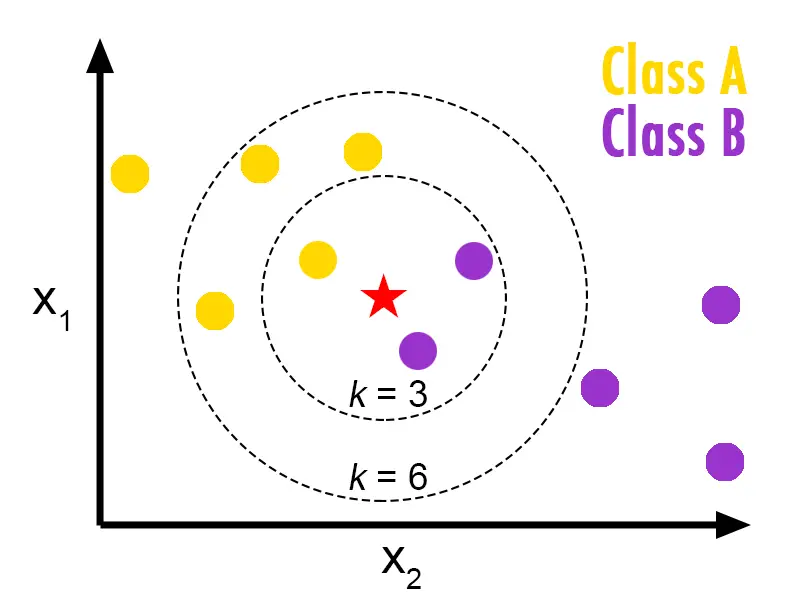

In [8]:
# Defino el modelo KNN
from sklearn.neighbors import KNeighborsClassifier

# Crear el modelo con un valor de k=5
knn = KNeighborsClassifier(n_neighbors=5)

# entrenar el modelo con los datos correspondientes
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [9]:
y_pred_knn = knn.predict(X_test)

y_pred_knn

array(['Bueno', 'Bueno', 'Regular', 'Bueno', 'Regular', 'Bueno', 'Malo',
       'Bueno', 'Regular', 'Regular', 'Malo', 'Bueno', 'Bueno', 'Regular',
       'Bueno', 'Bueno', 'Malo', 'Regular', 'Bueno', 'Malo', 'Bueno',
       'Malo', 'Malo', 'Malo', 'Regular', 'Malo', 'Bueno', 'Bueno',
       'Regular', 'Malo', 'Malo', 'Malo', 'Malo', 'Malo', 'Bueno', 'Malo',
       'Regular', 'Regular', 'Malo', 'Bueno', 'Malo', 'Regular', 'Bueno',
       'Regular', 'Bueno', 'Bueno', 'Bueno', 'Bueno', 'Malo', 'Bueno',
       'Regular', 'Malo', 'Malo', 'Bueno', 'Bueno', 'Malo', 'Bueno',
       'Bueno', 'Bueno', 'Malo', 'Bueno', 'Bueno', 'Regular', 'Malo',
       'Malo', 'Bueno', 'Regular', 'Bueno', 'Malo', 'Malo', 'Malo',
       'Malo', 'Malo', 'Malo', 'Regular', 'Regular', 'Bueno', 'Bueno',
       'Malo', 'Malo', 'Bueno', 'Regular', 'Bueno', 'Bueno', 'Bueno',
       'Malo', 'Malo', 'Malo', 'Bueno', 'Malo', 'Bueno', 'Regular',
       'Malo', 'Malo', 'Bueno', 'Bueno', 'Malo', 'Bueno', 'Bueno',
       'Bue

In [10]:
from sklearn.metrics import accuracy_score

# evaluacion del modelo segun su exactitud
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_knn

0.455

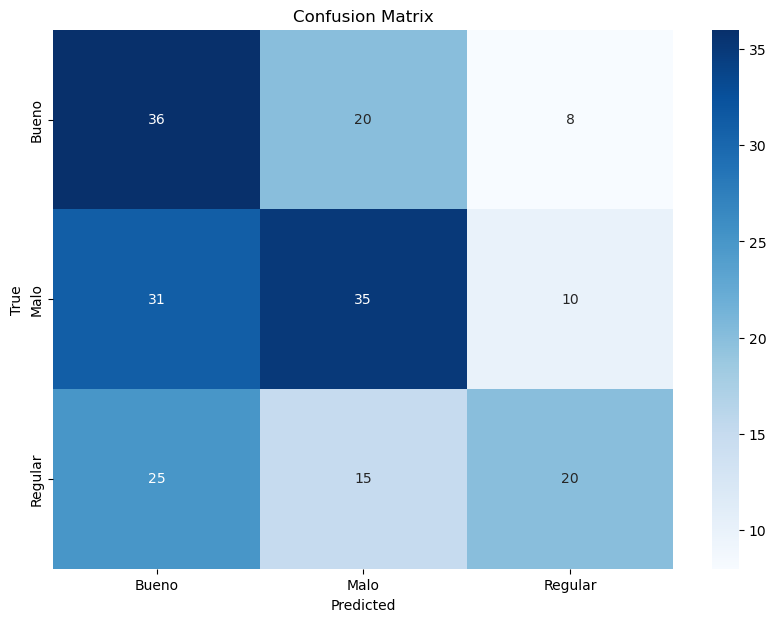

Accuracy: 0.455

Classification Report:
               precision    recall  f1-score   support

       Bueno       0.39      0.56      0.46        64
        Malo       0.50      0.46      0.48        76
     Regular       0.53      0.33      0.41        60

    accuracy                           0.46       200
   macro avg       0.47      0.45      0.45       200
weighted avg       0.47      0.46      0.45       200



In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report


# Obtener las clases
class_names = knn.classes_

# Predecir con el conjunto de prueba
y_pred = knn.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión con un mapa de calor
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calcular y mostrar todas las métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=class_names))

# Arbol de Clasificacion

In [12]:
from sklearn.tree import DecisionTreeClassifier

# Inicializar el clasificador de árbol de decisión
dt = DecisionTreeClassifier(random_state=42)

In [13]:
# Entrenar el clasificador con el conjunto de entrenamiento
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [14]:
# Realizar predicciones en el conjunto de prueba
y_pred_dt = dt.predict(X_test)

y_pred_dt

array(['Regular', 'Regular', 'Regular', 'Malo', 'Regular', 'Bueno',
       'Bueno', 'Malo', 'Bueno', 'Regular', 'Bueno', 'Bueno', 'Regular',
       'Regular', 'Bueno', 'Bueno', 'Bueno', 'Regular', 'Bueno',
       'Regular', 'Bueno', 'Malo', 'Bueno', 'Malo', 'Regular', 'Regular',
       'Bueno', 'Bueno', 'Regular', 'Malo', 'Regular', 'Malo', 'Regular',
       'Malo', 'Regular', 'Bueno', 'Regular', 'Malo', 'Malo', 'Regular',
       'Malo', 'Regular', 'Bueno', 'Regular', 'Bueno', 'Bueno', 'Regular',
       'Malo', 'Bueno', 'Regular', 'Malo', 'Malo', 'Regular', 'Bueno',
       'Bueno', 'Regular', 'Malo', 'Regular', 'Bueno', 'Malo', 'Bueno',
       'Malo', 'Regular', 'Regular', 'Malo', 'Bueno', 'Bueno', 'Regular',
       'Malo', 'Regular', 'Malo', 'Malo', 'Malo', 'Bueno', 'Bueno',
       'Regular', 'Regular', 'Regular', 'Bueno', 'Regular', 'Bueno',
       'Malo', 'Regular', 'Malo', 'Bueno', 'Malo', 'Malo', 'Malo',
       'Bueno', 'Malo', 'Bueno', 'Bueno', 'Bueno', 'Malo', 'Malo',
       'Bu

In [15]:
# Calcular la precisión del modelo
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_dt

0.735

# Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB
# Inicializar el clasificador Naive Bayes
nb = GaussianNB()

In [17]:
# Entrenar el modelo
nb.fit(X_train, y_train)


GaussianNB()

In [18]:
# Predecir las etiquetas de los datos de prueba
y_pred_nb = nb.predict(X_test)
y_pred_nb

array(['Bueno', 'Bueno', 'Bueno', 'Bueno', 'Bueno', 'Regular', 'Regular',
       'Bueno', 'Malo', 'Regular', 'Bueno', 'Regular', 'Bueno', 'Bueno',
       'Bueno', 'Regular', 'Bueno', 'Regular', 'Regular', 'Malo', 'Bueno',
       'Regular', 'Bueno', 'Malo', 'Bueno', 'Bueno', 'Malo', 'Malo',
       'Regular', 'Bueno', 'Bueno', 'Bueno', 'Bueno', 'Bueno', 'Malo',
       'Malo', 'Malo', 'Malo', 'Malo', 'Malo', 'Malo', 'Bueno', 'Malo',
       'Malo', 'Bueno', 'Malo', 'Malo', 'Malo', 'Malo', 'Regular',
       'Bueno', 'Malo', 'Regular', 'Bueno', 'Regular', 'Bueno', 'Bueno',
       'Regular', 'Malo', 'Bueno', 'Bueno', 'Bueno', 'Malo', 'Regular',
       'Malo', 'Regular', 'Regular', 'Malo', 'Regular', 'Bueno',
       'Regular', 'Bueno', 'Malo', 'Bueno', 'Regular', 'Malo', 'Bueno',
       'Bueno', 'Regular', 'Bueno', 'Regular', 'Regular', 'Malo', 'Malo',
       'Malo', 'Regular', 'Bueno', 'Regular', 'Bueno', 'Regular', 'Bueno',
       'Malo', 'Regular', 'Malo', 'Bueno', 'Malo', 'Bueno', 'Bueno',

In [19]:
# Calcular la precisión, matriz de confusión y reporte de clasificación
accuracy = accuracy_score(y_test, y_pred_nb)
accuracy

0.34

# Bosques Aleatorios (Random Forest)

In [20]:
from sklearn.ensemble import RandomForestClassifier
# Inicializar el clasificador Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [21]:
# Entrenar el modelo
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
# Predecir las etiquetas de los datos de prueba
y_pred_rf = rf.predict(X_test)

y_pred_rf

array(['Regular', 'Malo', 'Regular', 'Malo', 'Bueno', 'Bueno', 'Bueno',
       'Regular', 'Bueno', 'Bueno', 'Bueno', 'Regular', 'Regular',
       'Regular', 'Bueno', 'Bueno', 'Malo', 'Regular', 'Bueno', 'Bueno',
       'Bueno', 'Malo', 'Bueno', 'Malo', 'Regular', 'Regular', 'Malo',
       'Malo', 'Regular', 'Malo', 'Regular', 'Malo', 'Regular', 'Malo',
       'Regular', 'Regular', 'Regular', 'Malo', 'Malo', 'Regular', 'Malo',
       'Regular', 'Bueno', 'Regular', 'Bueno', 'Malo', 'Malo', 'Malo',
       'Bueno', 'Regular', 'Malo', 'Malo', 'Regular', 'Bueno', 'Regular',
       'Regular', 'Malo', 'Regular', 'Bueno', 'Malo', 'Bueno', 'Malo',
       'Malo', 'Malo', 'Malo', 'Bueno', 'Regular', 'Regular', 'Malo',
       'Regular', 'Malo', 'Malo', 'Malo', 'Bueno', 'Regular', 'Malo',
       'Regular', 'Malo', 'Bueno', 'Regular', 'Bueno', 'Regular', 'Bueno',
       'Malo', 'Malo', 'Malo', 'Malo', 'Malo', 'Bueno', 'Bueno', 'Malo',
       'Regular', 'Bueno', 'Malo', 'Malo', 'Bueno', 'Malo', 'Bueno

In [23]:
# Calcular la precisión, matriz de confusión y reporte de clasificación
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf

0.78

# Maquina de Soporte Vectorial (SVM)

In [24]:
from sklearn.svm import SVC

# Inicializar el clasificador SVM
svm = SVC(kernel='linear', C=1.0, random_state=42)

In [25]:
# Entrenar el modelo
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [26]:
# Predecir las etiquetas de los datos de prueba
y_pred_svm = svm.predict(X_test)
y_pred_svm

array(['Bueno', 'Bueno', 'Bueno', 'Malo', 'Bueno', 'Bueno', 'Bueno',
       'Bueno', 'Malo', 'Bueno', 'Bueno', 'Bueno', 'Bueno', 'Malo',
       'Bueno', 'Malo', 'Bueno', 'Malo', 'Bueno', 'Malo', 'Bueno',
       'Bueno', 'Bueno', 'Malo', 'Bueno', 'Bueno', 'Bueno', 'Bueno',
       'Bueno', 'Bueno', 'Bueno', 'Bueno', 'Malo', 'Bueno', 'Bueno',
       'Malo', 'Malo', 'Malo', 'Malo', 'Bueno', 'Malo', 'Bueno', 'Malo',
       'Malo', 'Malo', 'Malo', 'Bueno', 'Malo', 'Malo', 'Malo', 'Bueno',
       'Malo', 'Bueno', 'Bueno', 'Malo', 'Bueno', 'Bueno', 'Bueno',
       'Malo', 'Bueno', 'Bueno', 'Bueno', 'Malo', 'Bueno', 'Malo',
       'Bueno', 'Malo', 'Bueno', 'Malo', 'Bueno', 'Malo', 'Bueno', 'Malo',
       'Bueno', 'Malo', 'Malo', 'Malo', 'Malo', 'Bueno', 'Bueno', 'Malo',
       'Bueno', 'Malo', 'Bueno', 'Malo', 'Bueno', 'Bueno', 'Bueno',
       'Bueno', 'Bueno', 'Bueno', 'Bueno', 'Bueno', 'Malo', 'Bueno',
       'Malo', 'Bueno', 'Bueno', 'Bueno', 'Bueno', 'Malo', 'Bueno',
       'Malo', 'Bueno',

In [27]:
# Calcular la precisión, matriz de confusión y reporte de clasificación
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_svm

0.38

# Perceptron Multicapa (MLP)

In [28]:
from sklearn.neural_network import MLPClassifier

# Inicializar el clasificador MLP (Perceptrón Multicapa)
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=300, random_state=42)

In [29]:
# Entrenar el modelo
mlp.fit(X_train, y_train)

C:\Users\Diego\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=42)

In [30]:
# Predecir las etiquetas de los datos de prueba
y_pred_mlp = mlp.predict(X_test)
y_pred_mlp

array(['Malo', 'Bueno', 'Regular', 'Regular', 'Regular', 'Bueno', 'Malo',
       'Bueno', 'Regular', 'Bueno', 'Malo', 'Regular', 'Regular', 'Malo',
       'Regular', 'Bueno', 'Bueno', 'Regular', 'Bueno', 'Malo', 'Bueno',
       'Malo', 'Bueno', 'Malo', 'Regular', 'Regular', 'Bueno', 'Bueno',
       'Malo', 'Bueno', 'Regular', 'Bueno', 'Malo', 'Malo', 'Malo',
       'Malo', 'Regular', 'Malo', 'Malo', 'Bueno', 'Malo', 'Bueno',
       'Regular', 'Regular', 'Bueno', 'Regular', 'Regular', 'Malo',
       'Bueno', 'Malo', 'Bueno', 'Malo', 'Malo', 'Bueno', 'Bueno',
       'Regular', 'Bueno', 'Bueno', 'Bueno', 'Bueno', 'Bueno', 'Bueno',
       'Regular', 'Regular', 'Bueno', 'Bueno', 'Regular', 'Regular',
       'Malo', 'Bueno', 'Malo', 'Regular', 'Malo', 'Malo', 'Regular',
       'Bueno', 'Bueno', 'Bueno', 'Malo', 'Malo', 'Bueno', 'Regular',
       'Bueno', 'Bueno', 'Regular', 'Malo', 'Bueno', 'Malo', 'Bueno',
       'Malo', 'Bueno', 'Regular', 'Regular', 'Malo', 'Bueno', 'Bueno',
       'Malo'

In [31]:
# Calcular la precisión
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
accuracy_mlp

0.475

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tabulate import tabulate

# Supongamos que 'y_test' contiene tus etiquetas verdaderas y 'models_predictions' tus predicciones para cada modelo
models_predictions = {
    "KNN": y_pred_knn,
    "Naive Bayes": y_pred_nb,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "SVM": y_pred_svm,
    "MLP": y_pred_mlp
}

# Lista para almacenar las métricas de cada modelo
metrics = []

# Calcular métricas para cada modelo y añadir a la lista
for model_name, model_pred in models_predictions.items():
    model_metrics = [
        model_name,
        accuracy_score(y_test, model_pred),
        precision_score(y_test, model_pred, average='weighted'),
        recall_score(y_test, model_pred, average='weighted'),
        f1_score(y_test, model_pred, average='weighted')
    ]
    metrics.append(model_metrics)

# Crear la tabla con tabulate
headers = ["Algoritmo", "Exactitud", "Precisión", "Sensibilidad", "Medida F1"]
print(tabulate(metrics, headers=headers, tablefmt="fancy_grid"))


C:\Users\Diego\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


╒═══════════════╤═════════════╤═════════════╤════════════════╤═════════════╕
│ Algoritmo     │   Exactitud │   Precisión │   Sensibilidad │   Medida F1 │
╞═══════════════╪═════════════╪═════════════╪════════════════╪═════════════╡
│ KNN           │       0.455 │    0.473112 │          0.455 │    0.452333 │
├───────────────┼─────────────┼─────────────┼────────────────┼─────────────┤
│ Naive Bayes   │       0.34  │    0.345302 │          0.34  │    0.337499 │
├───────────────┼─────────────┼─────────────┼────────────────┼─────────────┤
│ Decision Tree │       0.735 │    0.739857 │          0.735 │    0.736442 │
├───────────────┼─────────────┼─────────────┼────────────────┼─────────────┤
│ Random Forest │       0.78  │    0.78053  │          0.78  │    0.779859 │
├───────────────┼─────────────┼─────────────┼────────────────┼─────────────┤
│ SVM           │       0.38  │    0.271459 │          0.38  │    0.311237 │
├───────────────┼─────────────┼─────────────┼────────────────┼─────────────┤